Table of content 
1. Import libraries/dependencies, import dataset 
2. Data preprocessing 
3. EDA & Statistical Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/bank-additional-balanced.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,42,admin.,married,high.school,no,no,no,cellular,nov,mon,...,2,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,yes
2,71,admin.,married,basic.4y,no,yes,yes,cellular,may,fri,...,4,3,2,success,-1.8,93.876,-40.0,0.684,5008.7,yes
3,39,blue-collar,married,basic.9y,no,yes,no,telephone,oct,fri,...,1,999,0,nonexistent,-0.1,93.798,-40.4,4.918,5195.8,yes
4,67,retired,married,professional.course,no,no,no,telephone,oct,mon,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,no


In [3]:
# check for missing values 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4118 entries, 0 to 4117
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4118 non-null   int64  
 1   job             4118 non-null   object 
 2   marital         4118 non-null   object 
 3   education       4118 non-null   object 
 4   default         4118 non-null   object 
 5   housing         4118 non-null   object 
 6   loan            4118 non-null   object 
 7   contact         4118 non-null   object 
 8   month           4118 non-null   object 
 9   day_of_week     4118 non-null   object 
 10  duration        4118 non-null   int64  
 11  campaign        4118 non-null   int64  
 12  pdays           4118 non-null   int64  
 13  previous        4118 non-null   int64  
 14  poutcome        4118 non-null   object 
 15  emp.var.rate    4118 non-null   float64
 16  cons.price.idx  4118 non-null   float64
 17  cons.conf.idx   4118 non-null   f

No missing values!!!! 

In [5]:
# check the data type for each feature 
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
# lets check for duplicates, find rows with duplicates across all columns
duplicateRows = df[df.duplicated()] #
print('Number of duplicates rows in dataset with same values in all cloumns:',duplicateRows.shape[0])

Number of duplicates rows in dataset with same values in all cloumns: 0


In [7]:
df.y.value_counts()

no     2059
yes    2059
Name: y, dtype: int64

In [8]:
Numeric_features = df.select_dtypes(exclude='object')
categorical_feature = df.select_dtypes(include='object')
print('Number of numerical feature in dataset:', len(Numeric_features.columns))
print('Number of categorical feature in dataset:', len(categorical_feature.columns))

Number of numerical feature in dataset: 10
Number of categorical feature in dataset: 11


In [9]:
# check out the numerical feature
Numeric_features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,48,66,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,42,651,2,999,1,-0.1,93.200,-42.0,4.191,5195.8
2,71,466,4,3,2,-1.8,93.876,-40.0,0.684,5008.7
3,39,112,1,999,0,-0.1,93.798,-40.4,4.918,5195.8
4,67,270,2,999,0,-3.4,92.431,-26.9,0.739,5017.5
...,...,...,...,...,...,...,...,...,...,...
4113,37,667,2,999,0,-0.1,93.200,-42.0,4.076,5195.8
4114,45,252,1,999,0,-2.9,92.469,-33.6,1.072,5076.2
4115,60,1640,1,999,0,-1.1,94.199,-37.5,0.876,4963.6
4116,49,80,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


Univariate analysis of numerical features:

1. Check for spread/distribution 
2. Check for central tendencies
3. Check for outliers

In [10]:
# Check for spread/distrubtion and central tendencies of each numerical feature 
print('Descriptive Statistics for age feature','\n', Numeric_features.age.describe())
print('\n')
print('Descriptive Statistics for duration feature','\n', Numeric_features.duration.describe())
print('\n')
print('Descriptive Statistics for campaign feature','\n', Numeric_features.campaign.describe())
print('\n')
print('Descriptive Statistics for pdays feature', '\n',Numeric_features.pdays.describe())
print('\n')
print('Descriptive Statistics for previous feature', '\n',Numeric_features.previous.describe())
print('\n')
print('Descriptive Statistics for emp.var.rate feature', '\n',Numeric_features['emp.var.rate'].describe())
print('\n')
print('Descriptive Statistics for cons.price.idx feature', '\n',Numeric_features['cons.price.idx'].describe())
print('\n')
print('Descriptive Statistics for cons.conf.idx feature', '\n',Numeric_features['cons.conf.idx'].describe())
print('\n')
print('Descriptive Statistics for euribor3m feature', '\n',Numeric_features['euribor3m'].describe())
print('\n')
print('Descriptive Statistics for nr.employed feature', '\n',Numeric_features['nr.employed'].describe())

Descriptive Statistics for age feature 
 count    4118.00000
mean       40.35017
std        11.96551
min        17.00000
25%        31.00000
50%        38.00000
75%        48.00000
max        98.00000
Name: age, dtype: float64


Descriptive Statistics for duration feature 
 count    4118.000000
mean      383.201797
std       358.455961
min         4.000000
25%       143.000000
50%       260.000000
75%       522.000000
max      3631.000000
Name: duration, dtype: float64


Descriptive Statistics for campaign feature 
 count    4118.000000
mean        2.307188
std         2.256688
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: campaign, dtype: float64


Descriptive Statistics for pdays feature 
 count    4118.000000
mean      888.314230
std       312.552613
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64


Descriptive Statistics for previous 

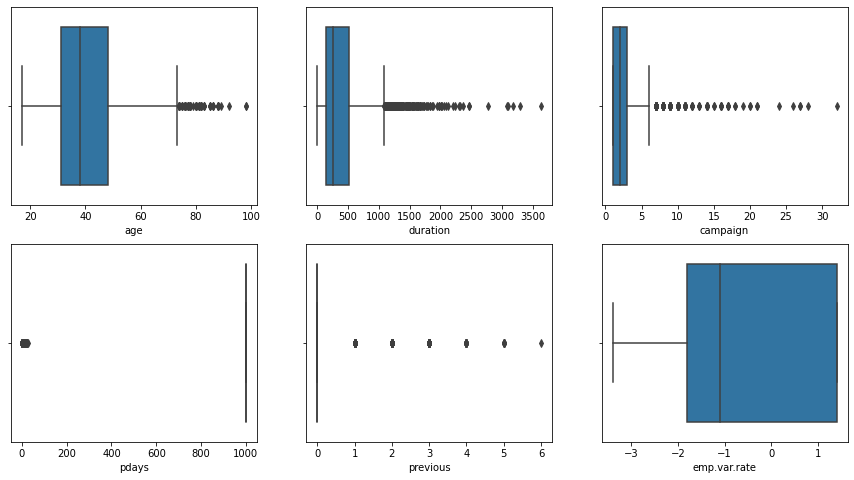

In [11]:
fig = plt.figure(figsize=(15,8))

plt.subplot(231)
sns.boxplot(x=Numeric_features["age"])

plt.subplot(2,3,2)
sns.boxplot(x=Numeric_features["duration"])

plt.subplot(233)
sns.boxplot(x=Numeric_features["campaign"])

plt.subplot(2,3,4)
sns.boxplot(x=Numeric_features["pdays"])

plt.subplot(235)
sns.boxplot(x=Numeric_features["previous"])

plt.subplot(2,3,6)
sns.boxplot(x=Numeric_features["emp.var.rate"])


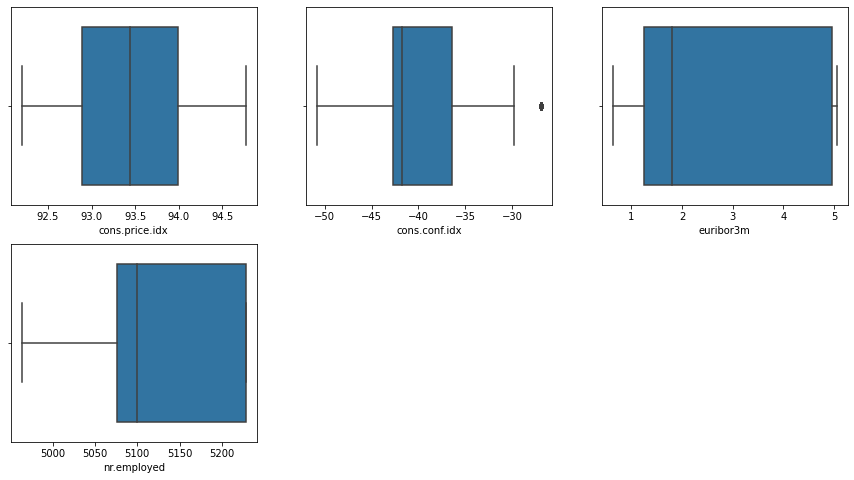

In [12]:
fig = plt.figure(figsize=(15,8))

plt.subplot(231)
sns.boxplot(x=Numeric_features["cons.price.idx"])

plt.subplot(2,3,2)
sns.boxplot(x=Numeric_features["cons.conf.idx"])

plt.subplot(233)
sns.boxplot(x=Numeric_features["euribor3m"])

plt.subplot(2,3,4)
sns.boxplot(x=Numeric_features["nr.employed"])



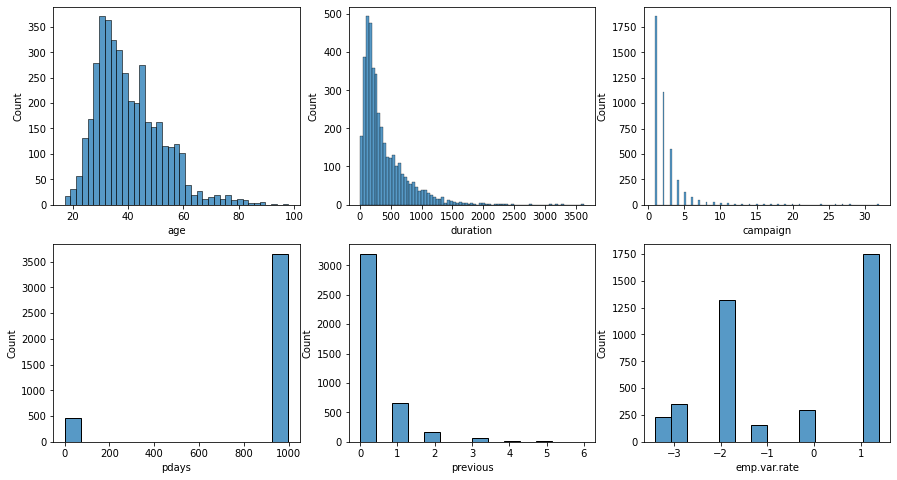

In [13]:
#
fig = plt.figure(figsize=(15,8))

plt.subplot(231)
sns.histplot(x=Numeric_features["age"])

plt.subplot(2,3,2)
sns.histplot(x=Numeric_features["duration"])

plt.subplot(233)
sns.histplot(x=Numeric_features["campaign"])

plt.subplot(2,3,4)
sns.histplot(x=Numeric_features["pdays"])

plt.subplot(235)
sns.histplot(x=Numeric_features["previous"])

plt.subplot(2,3,6)
sns.histplot(x=Numeric_features["emp.var.rate"])

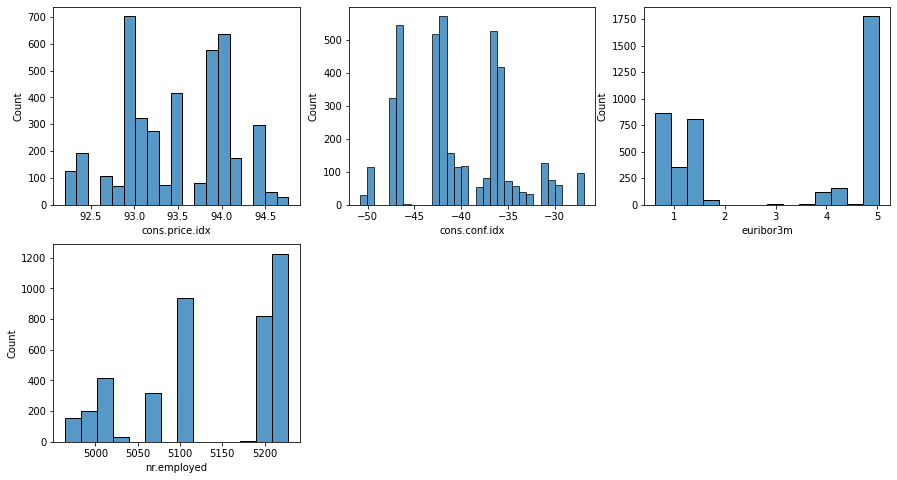

In [14]:
fig = plt.figure(figsize=(15,8))

plt.subplot(231)
sns.histplot(x=Numeric_features["cons.price.idx"])

plt.subplot(2,3,2)
sns.histplot(x=Numeric_features["cons.conf.idx"])

plt.subplot(233)
sns.histplot(x=Numeric_features["euribor3m"])

plt.subplot(2,3,4)
sns.histplot(x=Numeric_features["nr.employed"])

Outlier detection - Tukey IQR Method 
- Outliers/ extreme values in data are defined as: Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

In [15]:
# function to help Identify outliers 
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values


In [16]:
tukey_indices, tukey_values = find_outliers_tukey(df['age'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for age feature using tukey fance method')


[74 74 74 74 74 74 74 74 75 75 75 75 76 76 76 76 76 76 76 76 76 76 76 77
 77 77 77 77 77 77 78 78 78 78 78 78 78 78 78 79 80 80 80 80 80 80 80 81
 81 81 81 81 82 82 82 82 82 82 82 83 83 83 85 85 85 86 86 86 88 88 88 88
 88 89 92 98 98]


77 Outliers detected for age feature using tukey fance method


In [17]:
tukey_indices, tukey_values = find_outliers_tukey(df['duration'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for duration feature using tukey fance method')

[1092 1093 1094 1094 1095 1101 1104 1105 1106 1109 1109 1110 1111 1112
 1118 1119 1120 1123 1125 1126 1127 1127 1129 1130 1130 1132 1132 1133
 1134 1134 1135 1139 1139 1141 1142 1143 1143 1148 1149 1152 1152 1153
 1153 1156 1156 1161 1166 1171 1174 1176 1178 1178 1180 1181 1182 1183
 1184 1190 1192 1199 1201 1201 1203 1205 1206 1207 1210 1210 1211 1212
 1217 1222 1224 1226 1227 1230 1236 1240 1242 1242 1246 1248 1254 1257
 1258 1260 1262 1268 1275 1276 1285 1288 1288 1290 1297 1302 1303 1306
 1307 1311 1317 1319 1321 1327 1332 1333 1334 1334 1336 1336 1340 1352
 1353 1356 1357 1359 1359 1360 1360 1363 1363 1369 1370 1370 1391 1394
 1395 1399 1407 1426 1435 1439 1440 1441 1446 1448 1452 1460 1461 1463
 1469 1471 1472 1488 1489 1490 1491 1500 1505 1528 1531 1532 1543 1548
 1550 1554 1574 1575 1584 1602 1608 1613 1624 1640 1642 1642 1649 1663
 1665 1669 1689 1707 1723 1730 1735 1767 1777 1806 1833 1834 1855 1871
 1946 1970 1973 1975 2015 2016 2028 2055 2089 2122 2203 2231 2301 2316
 2372 

In [18]:
tukey_indices, tukey_values = find_outliers_tukey(df['campaign'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for campaign feature using tukey fance method')

[ 7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 12 12 12 12 12 13 13 13 14 14 14 14 14 14 14 15 15
 16 16 16 16 16 17 17 17 17 18 18 19 20 20 21 21 24 26 27 27 28 32]


166 Outliers detected for campaign feature using tukey fance method


In [19]:
tukey_indices, tukey_values = find_outliers_tukey(df['pdays'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for pdays feature using tukey fance method')

[ 0  0  0  0  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6

In [20]:
tukey_indices, tukey_values = find_outliers_tukey(df['previous'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for previous feature using tukey fance method')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [21]:
tukey_indices, tukey_values = find_outliers_tukey(df['emp.var.rate'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for emp.var.rate feature using tukey fance method')

[]


0 Outliers detected for emp.var.rate feature using tukey fance method


In [22]:
tukey_indices, tukey_values = find_outliers_tukey(df['cons.price.idx'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for cons.price.idx feature using tukey fance method')

[]


0 Outliers detected for cons.price.idx feature using tukey fance method


In [23]:
tukey_indices, tukey_values = find_outliers_tukey(df['cons.conf.idx'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for cons.conf.idx feature using tukey fance method')

[-26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9]


95 Outliers detected for cons.conf.idx feature using tukey fance method


In [24]:
tukey_indices, tukey_values = find_outliers_tukey(df['euribor3m'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for euribor3m feature using tukey fance method')

[]


0 Outliers detected for euribor3m feature using tukey fance method


In [25]:
tukey_indices, tukey_values = find_outliers_tukey(df['nr.employed'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for nr.employed feature using tukey fance method')

[]


0 Outliers detected for nr.employed feature using tukey fance method


Numeric to numeric bivariate statistics

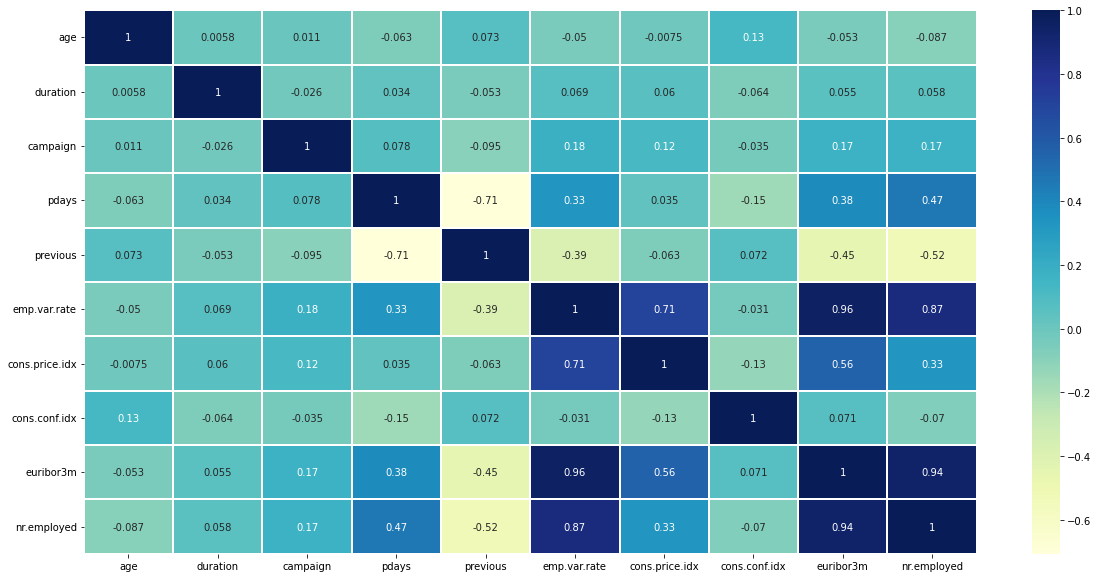

In [26]:
#plot corrlation using heatmap 
plt.figure(figsize=(20,10))
corr = Numeric_features.corr()
sns.heatmap(corr,annot= True, cmap = 'YlGnBu', linewidths=1)

In [27]:
Numeric_features.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.005834,0.011163,-0.063067,0.073240,-0.050321,-0.007546,0.132429,-0.052888,-0.087067
duration,0.005834,1.000000,-0.026167,0.033681,-0.052713,0.069354,0.059919,-0.063948,0.054998,0.058492
campaign,0.011163,-0.026167,1.000000,0.077691,-0.094846,0.180624,0.121671,-0.035025,0.168272,0.169426
pdays,-0.063067,0.033681,0.077691,1.000000,-0.706837,0.329867,0.035100,-0.153717,0.380717,0.465027
previous,0.073240,-0.052713,-0.094846,-0.706837,1.000000,-0.386271,-0.062805,0.071722,-0.450920,-0.521944
emp.var.rate,-0.050321,0.069354,0.180624,0.329867,-0.386271,1.000000,0.708890,-0.031439,0.957492,0.865720
cons.price.idx,-0.007546,0.059919,0.121671,0.035100,-0.062805,0.708890,1.000000,-0.127598,0.557035,0.330437
cons.conf.idx,0.132429,-0.063948,-0.035025,-0.153717,0.071722,-0.031439,-0.127598,1.000000,0.070534,-0.069622
euribor3m,-0.052888,0.054998,0.168272,0.380717,-0.450920,0.957492,0.557035,0.070534,1.000000,0.939952
nr.employed,-0.087067,0.058492,0.169426,0.465027,-0.521944,0.865720,0.330437,-0.069622,0.939952,1.000000


In [28]:
 # function to help Identify feautres with .50% or higher correlation
indices = np.where(corr > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]
indices

[('emp.var.rate', 'cons.price.idx'),
 ('emp.var.rate', 'euribor3m'),
 ('emp.var.rate', 'nr.employed'),
 ('cons.price.idx', 'euribor3m'),
 ('euribor3m', 'nr.employed')]

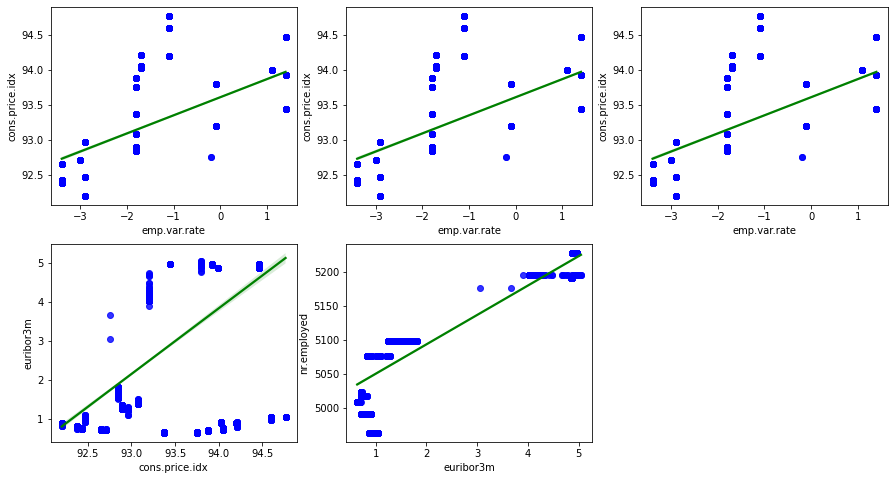

In [29]:
# scatterplot for feautres with .50% or higher correlation
fig = plt.figure(figsize=(15,8))

plt.subplot(231)
sns.regplot(x="emp.var.rate", y="cons.price.idx", data=Numeric_features, scatter_kws={"color": "blue"}, line_kws={"color": "green"})

plt.subplot(2,3,2)
sns.regplot(x="emp.var.rate", y="cons.price.idx", data=Numeric_features, scatter_kws={"color": "blue"}, line_kws={"color": "green"})

plt.subplot(233)
sns.regplot(x="emp.var.rate", y="cons.price.idx", data=Numeric_features, scatter_kws={"color": "blue"}, line_kws={"color": "green"})

plt.subplot(2,3,4)
sns.regplot(x="cons.price.idx", y="euribor3m", data=Numeric_features, scatter_kws={"color": "blue"}, line_kws={"color": "green"})

plt.subplot(235)
sns.regplot(x="euribor3m", y="nr.employed", data=Numeric_features, scatter_kws={"color": "blue"}, line_kws={"color": "green"})


Numeric to target variable (Categorical): bivariate statistics
- Run Z-test and T-test for numerical features with target variable. This there a statistical significance different for target variable 'yes' or 'no' in terms of the numerical features. Using a 0.05 critical level 

In [30]:
# split each numerical feature based on weather target variable is 'yes' or 'no

yes_age = df.loc[df['y'] == 'yes']
yes_age = yes_age['age']
no_age = df.loc[df['y'] == 'no']
no_age = no_age['age']


yes_duration = df.loc[df['y'] == 'yes']
yes_duration = yes_duration['duration']
no_duration = df.loc[df['y'] == 'no']
no_duration = no_duration['duration']


yes_campaign = df.loc[df['y'] == 'yes']
yes_campaign = yes_campaign['campaign']
no_campaign = df.loc[df['y'] == 'no']
no_campaign = no_campaign['campaign']


yes_pdays = df.loc[df['y'] == 'yes']
yes_pdays = yes_pdays['pdays']
no_pdays = df.loc[df['y'] == 'no']
no_pdays = no_pdays['pdays']

yes_previous = df.loc[df['y'] == 'yes']
yes_previous = yes_previous['previous']
no_previous = df.loc[df['y'] == 'no']
no_previous = no_previous['previous']

yes_rate = df.loc[df['y'] == 'yes']
yes_rate = yes_rate['emp.var.rate']
no_rate = df.loc[df['y'] == 'no']
no_rate = no_rate['emp.var.rate']


yes_price = df.loc[df['y'] == 'yes']
yes_price = yes_price['cons.price.idx']
no_price = df.loc[df['y'] == 'no']
no_price = no_price['cons.price.idx']


yes_conf = df.loc[df['y'] == 'yes']
yes_conf = yes_conf['cons.conf.idx']
no_conf = df.loc[df['y'] == 'no']
no_conf = no_conf['cons.conf.idx']


yes_euribor3m = df.loc[df['y'] == 'yes']
yes_euribor3m = yes_euribor3m['euribor3m']
no_euribor3m = df.loc[df['y'] == 'no']
no_euribor3m = no_euribor3m['euribor3m']


yes_employed = df.loc[df['y'] == 'yes']
yes_employed = yes_employed['nr.employed']
no_employed = df.loc[df['y'] == 'no']
no_employed = no_employed['nr.employed']

In [31]:
# two-sided z-test for a numerical features in the dataset 

ztest , propability_value = stests.ztest(x1=yes_age, x2=no_age, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for age, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for age, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_duration, x2=no_duration, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for duration, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for duration, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_campaign, x2=no_campaign, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for campaign, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for campaign, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_pdays, x2=no_pdays, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for pdays, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for pdays, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_previous, x2=no_previous, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for previous, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for previous, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_rate, x2=no_rate, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for emp.var.rate, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for emp.var.rate, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_price, x2=no_price, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for cons.price.idx, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for cons.price.idx, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_conf, x2=no_conf, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for cons.conf.idx, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for cons.conf.idx, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_euribor3m, x2=no_euribor3m, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for euribor3m, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for euribor3m, Alternative hyphothesis rejected")

print('\n')

ztest , propability_value = stests.ztest(x1=yes_employed, x2=no_employed, value=0, alternative='two-sided')
print(propability_value)
if propability_value < 0.05:
  print("Null hyphothesis is rejected for nr.employed, Alternative hyphothesis accepted")
else:
  print("Null hyphothesis is accepted for nr.employed, Alternative hyphothesis rejected")


0.0013890320521125542
Null hyphothesis is rejected for age, Alternative hyphothesis accepted


9.88469330557495e-255
Null hyphothesis is rejected for duration, Alternative hyphothesis accepted


3.3176705773092475e-14
Null hyphothesis is rejected for campaign, Alternative hyphothesis accepted


9.970631156720149e-95
Null hyphothesis is rejected for pdays, Alternative hyphothesis accepted


2.076625554907347e-65
Null hyphothesis is rejected for previous, Alternative hyphothesis accepted


8.587670226748278e-186
Null hyphothesis is rejected for emp.var.rate, Alternative hyphothesis accepted


8.531964985988673e-26
Null hyphothesis is rejected for cons.price.idx, Alternative hyphothesis accepted


2.918778146013509e-05
Null hyphothesis is rejected for cons.conf.idx, Alternative hyphothesis accepted


1.3205570460257533e-208
Null hyphothesis is rejected for euribor3m, Alternative hyphothesis accepted


6.817350264902169e-239
Null hyphothesis is rejected for nr.employed, Alternative hyphoth

Ttest_indResult(statistic=3.1969204972671794, pvalue=0.001399546277276899)


p-value = 0.0013995463
In target variable there is a statistical significance difference between yes and no age feature


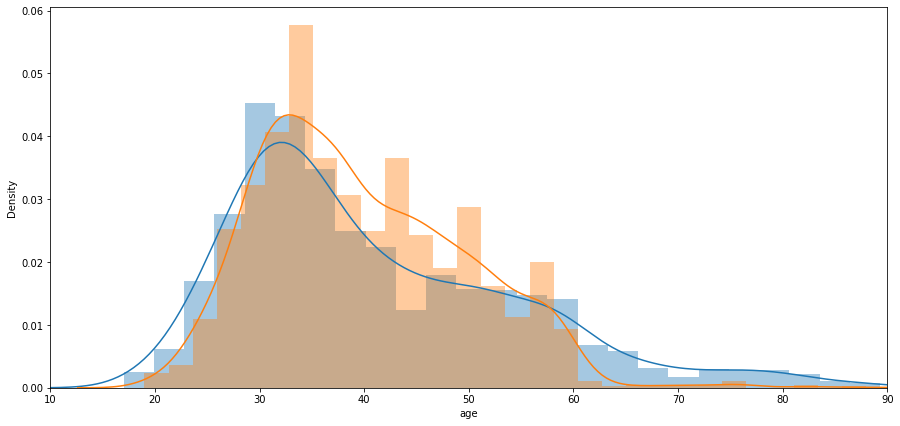

In [32]:
plt.figure(figsize=(15,7))
sns.distplot(yes_age, label='Yes')
sns.distplot(no_age, label='No')
plt.xlim(10,90)

print(stats.ttest_ind(yes_age, no_age))
print('\n')
t, p = stats.ttest_ind(yes_age, no_age)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no age feature')
else:
  print('In target variable there is no statistical significance difference between yes and no age feature')
  

Ttest_indResult(statistic=34.09142166489391, pvalue=1.3586368326163754e-224)


p-value = 0.0000000000
In target variable there is a statistical significance difference between yes and no duration feature


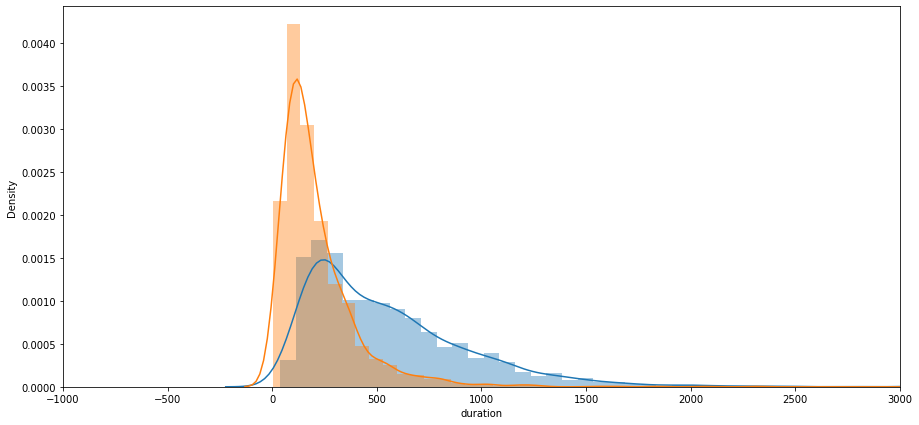

In [33]:
plt.figure(figsize=(15,7))
sns.distplot(yes_duration, label='Yes')
sns.distplot(no_duration, label='No')
plt.xlim(-1000,3000)

print(stats.ttest_ind(yes_duration, no_duration))
print('\n')
t, p = stats.ttest_ind(yes_duration, no_duration)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no duration feature')
else:
  print('In target variable there is no statistical significance difference between yes and no duration feature')
  

Ttest_indResult(statistic=-7.585281075971684, pvalue=4.077027074673504e-14)


p-value = 0.0000000000
In target variable there is a statistical significance difference between yes and no campaign feature


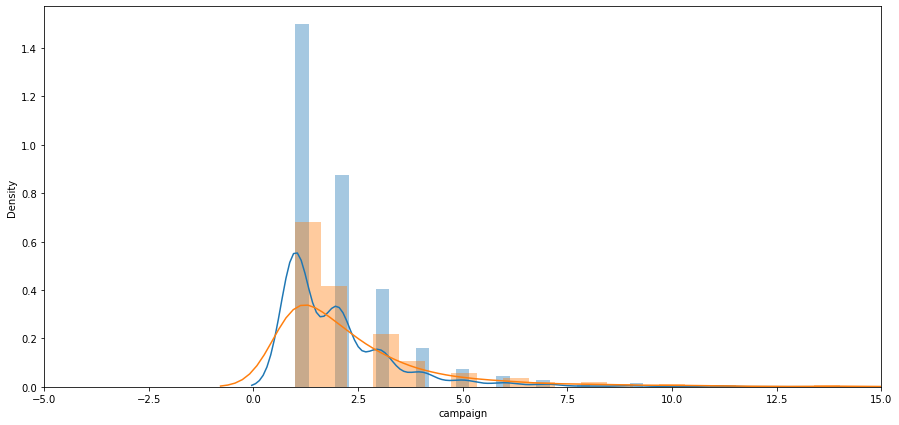

In [34]:
plt.figure(figsize=(15,7))
sns.distplot(yes_campaign, label='Yes')
sns.distplot(no_campaign, label='No')
plt.xlim(-5,15)

print(stats.ttest_ind(yes_campaign, no_campaign))
print('\n')
t, p = stats.ttest_ind(yes_campaign, no_campaign)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no campaign feature')
else:
  print('In target variable there is no statistical significance difference between yes and no campaign feature')
  

Ttest_indResult(statistic=-20.648978232690855, pvalue=3.2231768934944163e-90)


p-value = 0.0000000000
In target variable there is a statistical significance difference between yes and no pdays feature


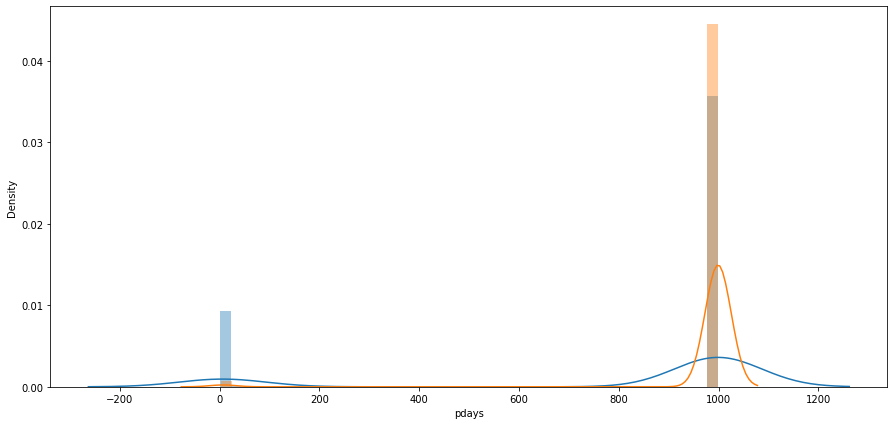

In [35]:
plt.figure(figsize=(15,7))
sns.distplot(yes_pdays, label='Yes')
sns.distplot(no_pdays, label='No')

print(stats.ttest_ind(yes_pdays, no_pdays))
print('\n')
t, p = stats.ttest_ind(yes_pdays, no_pdays)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no pdays feature')
else:
  print('In target variable there is no statistical significance difference between yes and no pdays feature')
  

Ttest_indResult(statistic=17.080407756602767, pvalue=2.9962859023875863e-63)


p-value = 0.0000000000
In target variable there is a statistical significance difference between yes and no previous feature


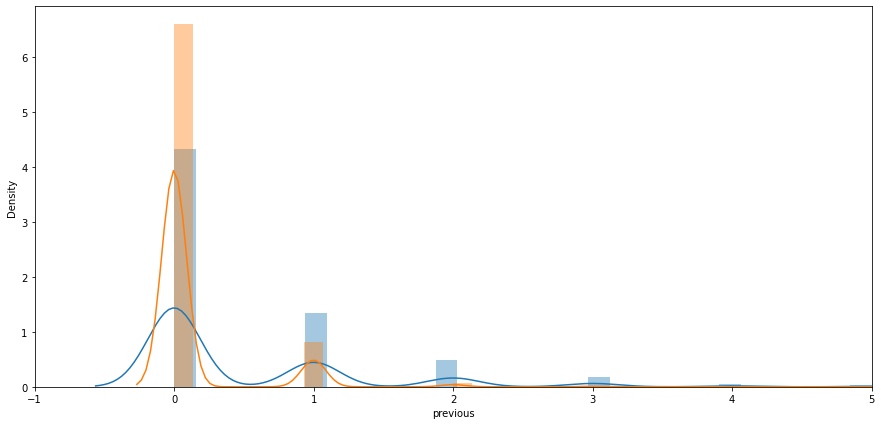

In [36]:
plt.figure(figsize=(15,7))
sns.distplot(yes_previous, label='Yes')
sns.distplot(no_previous, label='No')
plt.xlim(-1, 5)

print(stats.ttest_ind(yes_previous, no_previous))
print('\n')
t, p = stats.ttest_ind(yes_previous, no_previous)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no previous feature')
else:
  print('In target variable there is no statistical significance difference between yes and no previous feature')
  

Ttest_indResult(statistic=-29.070047136921964, pvalue=3.7597048983977387e-169)


p-value = 0.0000000000
In target variable there is a statistical significance difference between yes and no emp.var.rate feature


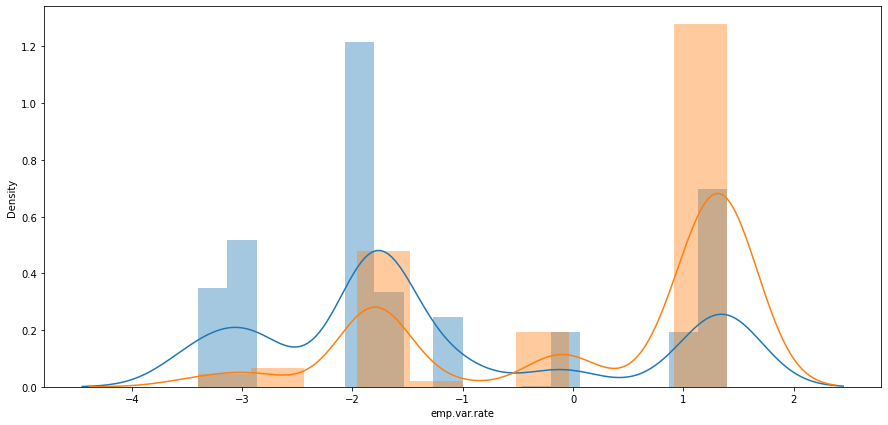

In [37]:
plt.figure(figsize=(15,7))
sns.distplot(yes_rate, label='Yes')
sns.distplot(no_rate, label='No')

print(stats.ttest_ind(yes_rate, no_rate))
print('\n')
t, p = stats.ttest_ind(yes_rate, no_rate)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no emp.var.rate feature')
else:
  print('In target variable there is no statistical significance difference between yes and no emp.var.rate feature')
  

Ttest_indResult(statistic=-10.501166004511111, pvalue=1.7861704085183388e-25)


p-value = 0.0000000000
In target variable there is a statistical significance difference between yes and no cons.price.idx feature


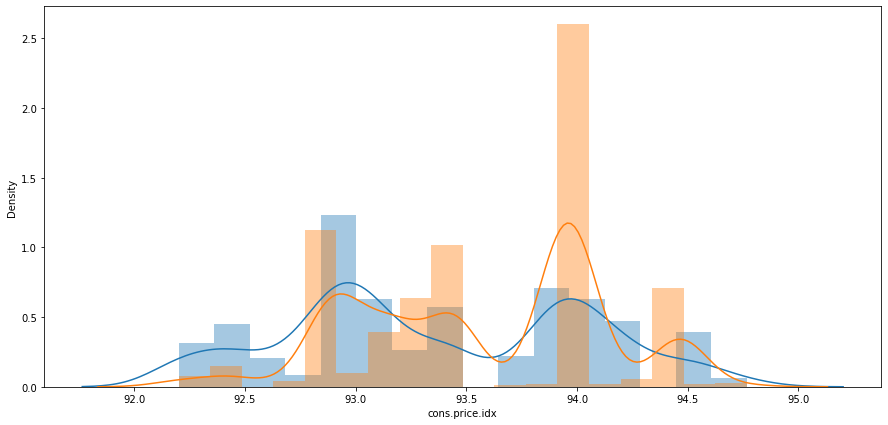

In [38]:
plt.figure(figsize=(15,7))
sns.distplot(yes_price, label='Yes')
sns.distplot(no_price, label='No')

print(stats.ttest_ind(yes_price, no_price))
print('\n')
t, p = stats.ttest_ind(yes_price, no_price)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no cons.price.idx feature')
else:
  print('In target variable there is no statistical significance difference between yes and no cons.price.idx feature')
  

Ttest_indResult(statistic=4.179712539806568, pvalue=2.9794142290539373e-05)


p-value = 0.0000297941
In target variable there is a statistical significance difference between yes and no cons.conf.idx feature


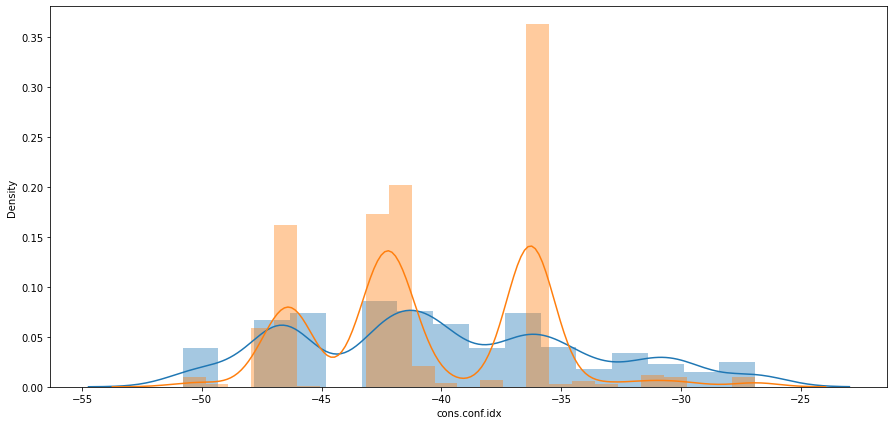

In [39]:
plt.figure(figsize=(15,7))
sns.distplot(yes_conf, label='Yes')
sns.distplot(no_conf, label='No')

print(stats.ttest_ind(yes_conf, no_conf))
print('\n')
t, p = stats.ttest_ind(yes_conf, no_conf)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no cons.conf.idx feature')
else:
  print('In target variable there is no statistical significance difference between yes and no cons.conf.idx feature')
  

Ttest_indResult(statistic=-30.822218241744668, pvalue=7.005337136043677e-188)


p-value = 0.0000000000
In target variable there is a statistical significance difference between yes and no euribor3m feature


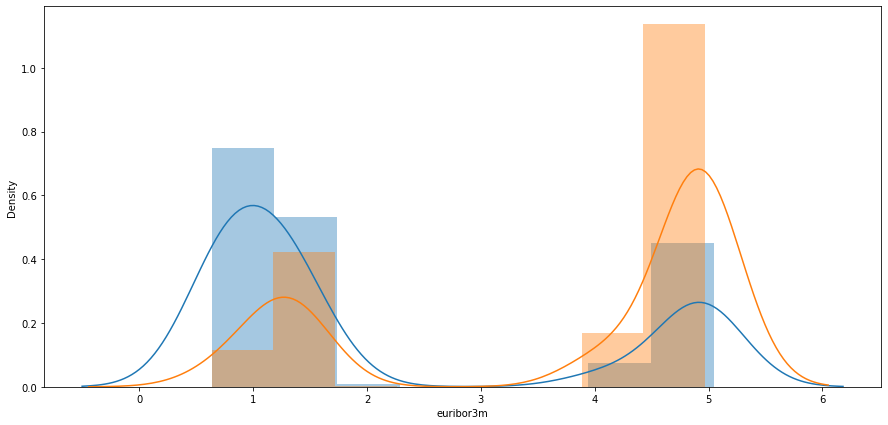

In [40]:
plt.figure(figsize=(15,7))
sns.distplot(yes_euribor3m, label='Yes')
sns.distplot(no_euribor3m, label='No')

print(stats.ttest_ind(yes_euribor3m, no_euribor3m))
print('\n')
t, p = stats.ttest_ind(yes_euribor3m, no_euribor3m)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no euribor3m feature')
else:
  print('In target variable there is no statistical significance difference between yes and no euribor3m feature')
  

Ttest_indResult(statistic=-33.00530232838989, pvalue=3.7175570219341017e-212)


p-value = 0.0000000000
In target variable there is a statistical significance difference between yes and no nr.employed feature


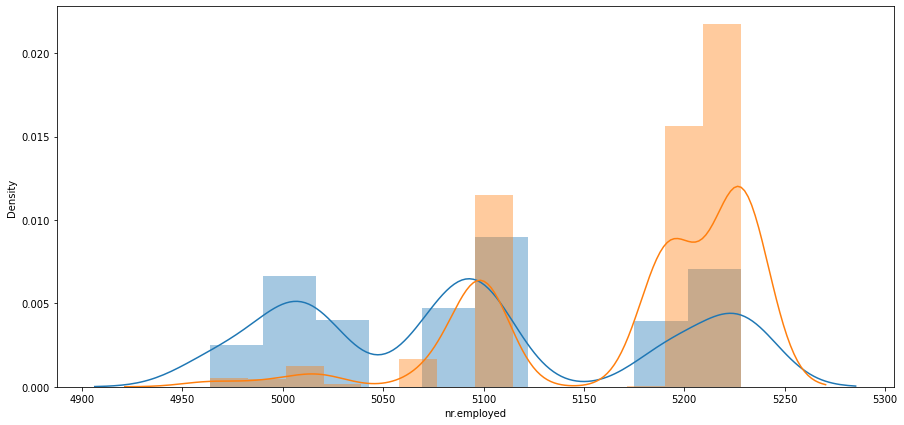

In [41]:
plt.figure(figsize=(15,7))
sns.distplot(yes_employed, label='Yes')
sns.distplot(no_employed, label='No')

print(stats.ttest_ind(yes_employed, no_employed))
print('\n')
t, p = stats.ttest_ind(yes_employed, no_employed)
print('p-value = %.10f' % (p))
if p < .05:
  print('In target variable there is a statistical significance difference between yes and no nr.employed feature')
else:
  print('In target variable there is no statistical significance difference between yes and no nr.employed feature')
  

Categorical to Categorical bivariate statistics 
- Distribution of each categorical feature
- Group each categorical feature by Age feature as age has a normal distribution
- Distribution of each categorical feature with respect to target variable 
- Run a Chi-Square Test between Categorical features and target variable using a 0.05 critical level 

In [42]:
# Lets check the number of distinct values in each qualitative feautres
uniqueValues = categorical_feature.nunique()
uniqueValues = uniqueValues.to_frame()
print('Number of distinct value in each qualitative column:')
print('\n')
uniqueValues

Number of distinct value in each qualitative column:




,0
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5
poutcome,3


In [43]:
# lets look at job feature that has 12 distinct values and there distribution 
job = categorical_feature['job'].value_counts().to_frame()
job['Percent of all job types'] = job['job'] / sum(job['job'])
job

,job,Percent of all job types
admin.,1118,0.271491
blue-collar,770,0.186984
technician,624,0.151530
services,378,0.091792
management,292,0.070908
retired,268,0.065080
student,152,0.036911
entrepreneur,145,0.035211
self-employed,129,0.031326
unemployed,114,0.027683


In [44]:
# group by age and job 
job_age = df.groupby("job")["age"].mean()
job_age

job
admin.           38.021467
blue-collar      39.441558
entrepreneur     41.303448
housemaid        47.864583
management       42.236301
retired          65.735075
self-employed    38.852713
services         36.804233
student          25.296053
technician       38.397436
unemployed       40.359649
unknown          44.375000
Name: age, dtype: float64

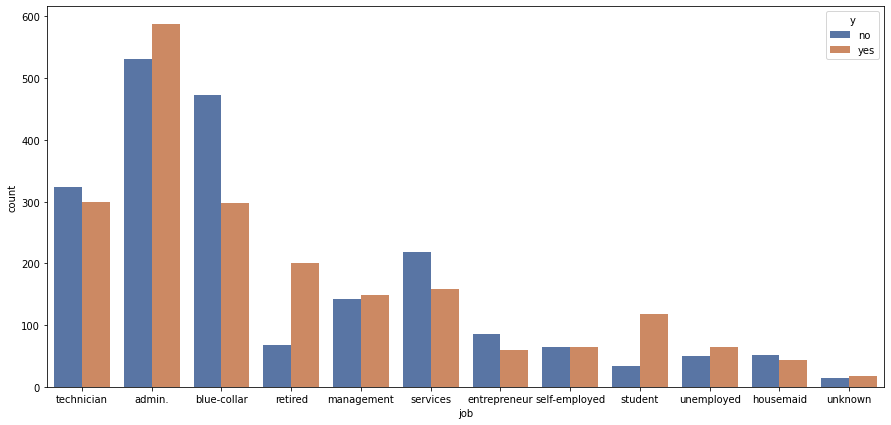

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x ='job', hue = "y", data = df, palette = 'deep')

In [46]:
chi_sq_job_y = pd.crosstab(df['job'],df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_job_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  


Chi Value: 172.9610355531096
2.898597847740572e-31


This indicates there is an association between the two variables (one has an impact on the other)


In [47]:
# lets look at marital feature that has 4 distinct values and there distribution 
marital = categorical_feature['marital'].value_counts().to_frame()
marital['Percent of all marital types'] = marital['marital'] / sum(marital['marital'])
marital

,marital,Percent of all marital types
married,2409,0.584993
single,1270,0.308402
divorced,427,0.103691
unknown,12,0.002914


In [48]:
# group by age and marital 
marital_age = df.groupby("marital")["age"].mean()
marital_age

marital
divorced    46.562061
married     43.503528
single      32.287402
unknown     39.583333
Name: age, dtype: float64

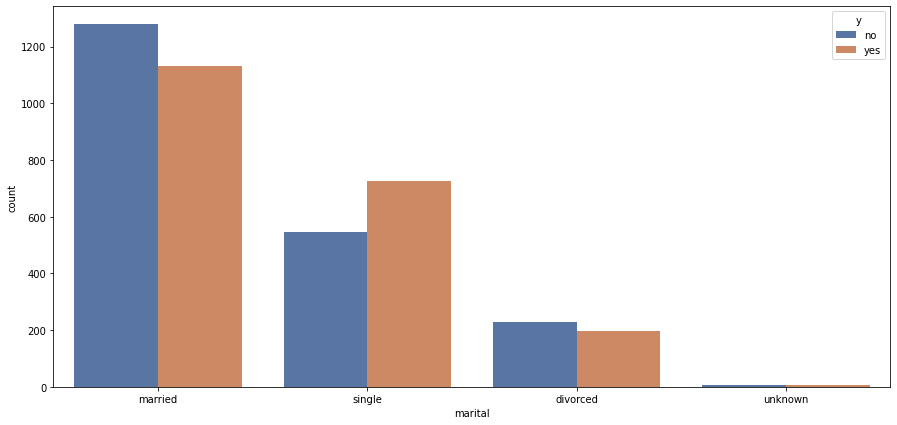

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(x ='marital', hue = "y", data = df, palette = 'deep')

In [50]:
chi_sq_marital_y = pd.crosstab(df['marital'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_marital_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  


Chi Value: 36.801828197153654
5.067724096634085e-08


This indicates there is an association between the two variables (one has an impact on the other)


In [51]:
# lets look at education feature that has 8 distinct values and there distribution 
education = categorical_feature['education'].value_counts().to_frame()
education['Percent of all education types'] = education['education'] / sum(education['education'])
education

,education,Percent of all education types
university.degree,1328,0.322487
high.school,960,0.233123
basic.9y,532,0.129189
professional.course,500,0.121418
basic.4y,404,0.098106
unknown,199,0.048324
basic.6y,194,0.047110
illiterate,1,0.000243


In [52]:
# group by age and education 
education_age = df.groupby("education")["age"].mean()
education_age

education
basic.4y               51.893564
basic.6y               40.154639
basic.9y               38.500000
high.school            37.633333
illiterate             44.000000
professional.course    40.710000
university.degree      38.875000
unknown                44.080402
Name: age, dtype: float64

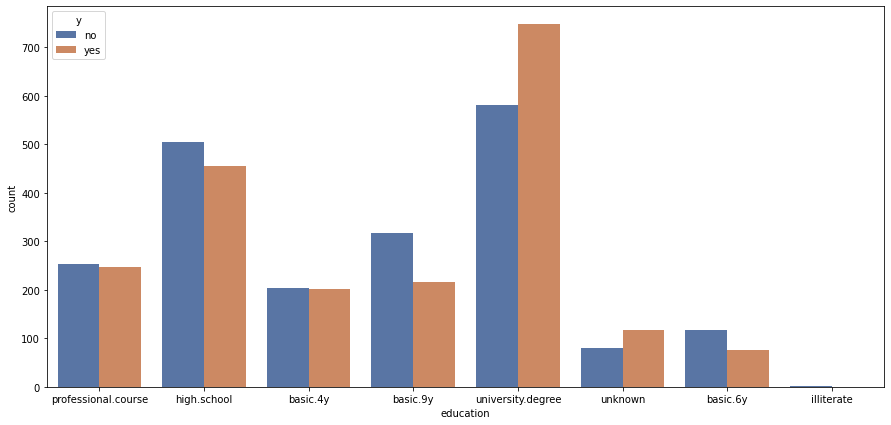

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x ='education', hue = "y", data = df, palette = 'deep')

In [54]:
chi_sq_education_y = pd.crosstab(df['education'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_education_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  


Chi Value: 59.26124062804794
2.1197013522356735e-10


This indicates there is an association between the two variables (one has an impact on the other)


In [55]:
# lets look at default feature that has 3 distinct values and there distribution 
default = categorical_feature['default'].value_counts().to_frame()
default['Percent of all default types'] = default['default'] / sum(default['default'])
default

,default,Percent of all default types
no,3433,0.833657
unknown,684,0.166100
yes,1,0.000243


In [56]:
# group by age and default 
default_age = df.groupby("default")["age"].mean()
default_age

default
no         39.750655
unknown    43.347953
yes        48.000000
Name: age, dtype: float64

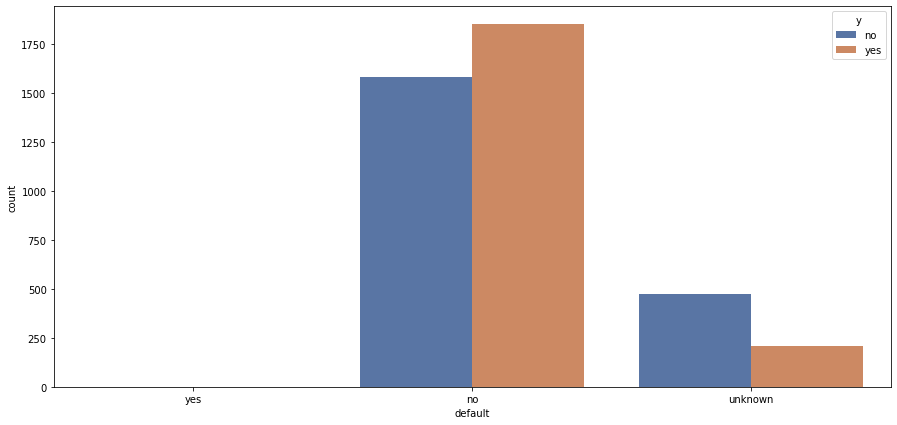

In [57]:
plt.figure(figsize=(15,7))
sns.countplot(x ='default', hue = "y", data = df, palette = 'deep')

In [58]:
chi_sq_default_y = pd.crosstab(df['default'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_default_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  


Chi Value: 127.08391378485051
2.535588376785913e-28


This indicates there is an association between the two variables (one has an impact on the other)


In [59]:
# lets look at housing feature that has 3 distinct values and there distribution 
housing = categorical_feature['housing'].value_counts().to_frame()
housing['Percent of all housing types'] = housing['housing'] / sum(housing['housing'])
housing

,housing,Percent of all housing types
yes,2175,0.528169
no,1855,0.450461
unknown,88,0.021370


In [60]:
# group by age and housing 
housing_age = df.groupby("housing")["age"].mean()
housing_age

housing
no         40.166038
unknown    39.954545
yes        40.523218
Name: age, dtype: float64

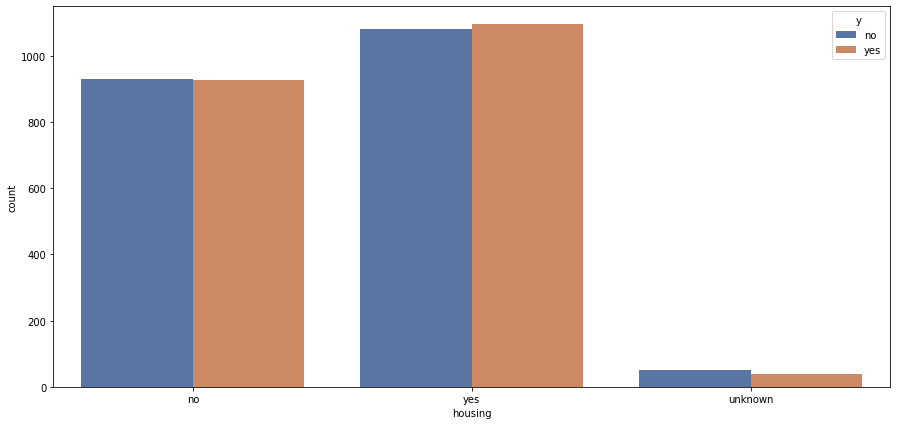

In [61]:
plt.figure(figsize=(15,7))
sns.countplot(x ='housing', hue = "y", data = df, palette = 'deep')

In [62]:
chi_sq_housing_y = pd.crosstab(df['housing'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_housing_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  


Chi Value: 1.7446636642472688
0.417975762694221


This indicates there is no association between the two variables (one has an impact on the other)


In [63]:
# lets look at loan feature that has 3 distinct values and there distribution 
loan = categorical_feature['loan'].value_counts().to_frame()
loan['Percent of all loan types'] = loan['loan'] / sum(loan['loan'])
loan

,loan,Percent of all loan types
no,3417,0.829772
yes,613,0.148859
unknown,88,0.021370


In [64]:
# group by age and loan 
loan_age = df.groupby("loan")["age"].mean()
loan_age

loan
no         40.411765
unknown    39.954545
yes        40.063622
Name: age, dtype: float64

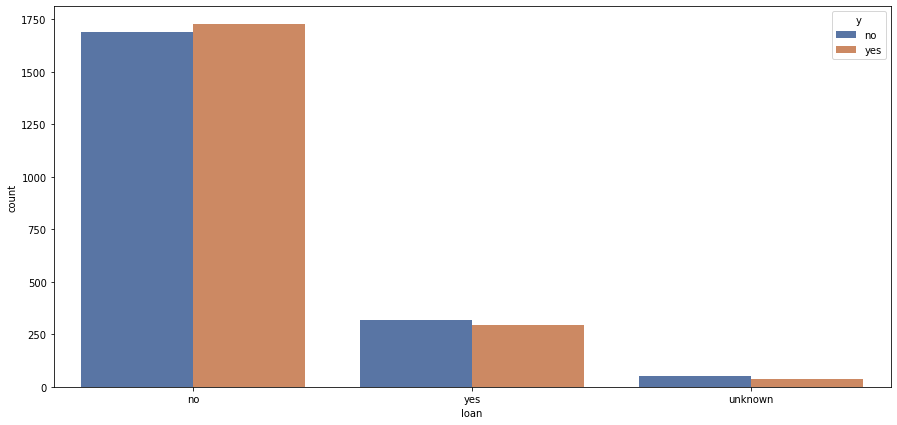

In [65]:
plt.figure(figsize=(15,7))
sns.countplot(x ='loan', hue = "y", data = df, palette = 'deep')

In [66]:
chi_sq_loan_y = pd.crosstab(df['loan'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_loan_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  

Chi Value: 2.857834250856664
0.23956820414998056


This indicates there is no association between the two variables (one has an impact on the other)


In [67]:
# lets look at contact feature that has 2 distinct values and there distribution 
contact = categorical_feature['contact'].value_counts().to_frame()
contact['Percent of all contact types'] = contact['contact'] / sum(contact['contact'])
contact

,contact,Percent of all contact types
cellular,2984,0.724624
telephone,1134,0.275376


In [68]:
# group by age and contact 
contact_age = df.groupby("contact")["age"].mean()
contact_age

contact
cellular     40.447721
telephone    40.093474
Name: age, dtype: float64

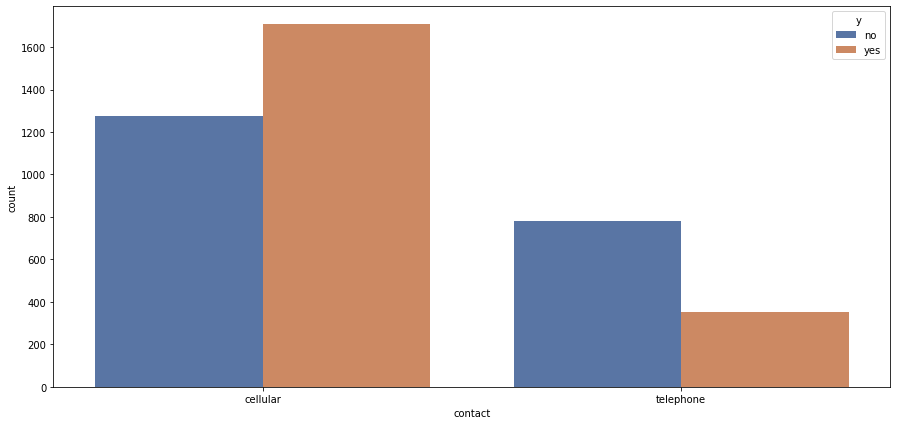

In [69]:
plt.figure(figsize=(15,7))
sns.countplot(x ='contact', hue = "y", data = df, palette = 'deep')

In [70]:
chi_sq_contact_y = pd.crosstab(df['contact'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_contact_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  

Chi Value: 223.9695891314524
1.2318258179733102e-50


This indicates there is an association between the two variables (one has an impact on the other)


In [71]:
# lets look at month feature that has 12 distinct values and there distribution 
month = categorical_feature['month'].value_counts().to_frame()
month['Percent of all month types'] = month['month'] / sum(month['month'])
month

,month,Percent of all month types
may,1130,0.274405
jul,645,0.156629
aug,595,0.144488
jun,510,0.123847
apr,380,0.092278
nov,378,0.091792
oct,165,0.040068
sep,141,0.034240
mar,139,0.033754
dec,35,0.008499


In [72]:
# group by age and month 
month_age = df.groupby("month")["age"].mean()
month_age

month
apr    40.786842
aug    42.223529
dec    46.657143
jul    39.468217
jun    39.170588
mar    42.510791
may    38.650442
nov    41.399471
oct    44.078788
sep    42.319149
Name: age, dtype: float64

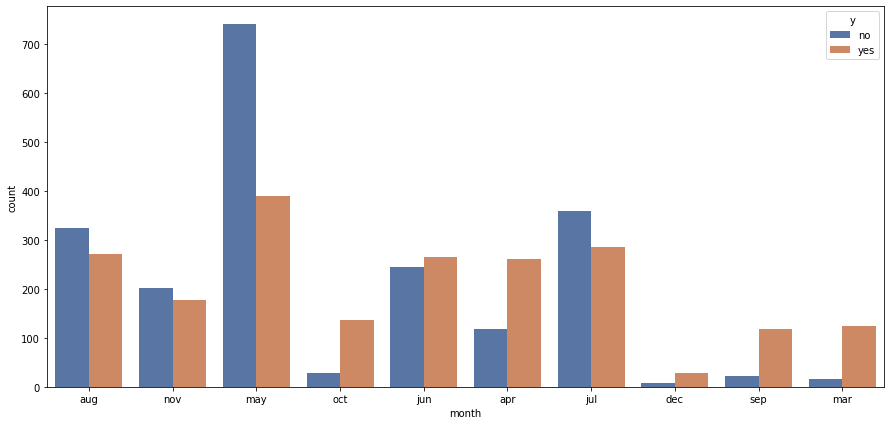

In [73]:
plt.figure(figsize=(15,7))
sns.countplot(x ='month', hue = "y", data = df, palette = 'deep')

In [74]:
chi_sq_month_y = pd.crosstab(df['month'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_month_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  

Chi Value: 413.73746778349073
1.6021841101376811e-83


This indicates there is an association between the two variables (one has an impact on the other)


In [75]:
# lets look at poutcome feature that has 4 distinct values and there distribution 
poutcome = categorical_feature['poutcome'].value_counts().to_frame()
poutcome['Percent of all poutcome types'] = poutcome['poutcome'] / sum(poutcome['poutcome'])
poutcome

,poutcome,Percent of all poutcome types
nonexistent,3201,0.777319
failure,488,0.118504
success,429,0.104177


In [76]:
# group by age and poutcome 
poutcome_age = df.groupby("poutcome")["age"].mean()
poutcome_age

poutcome
failure        41.385246
nonexistent    39.905342
success        42.491841
Name: age, dtype: float64

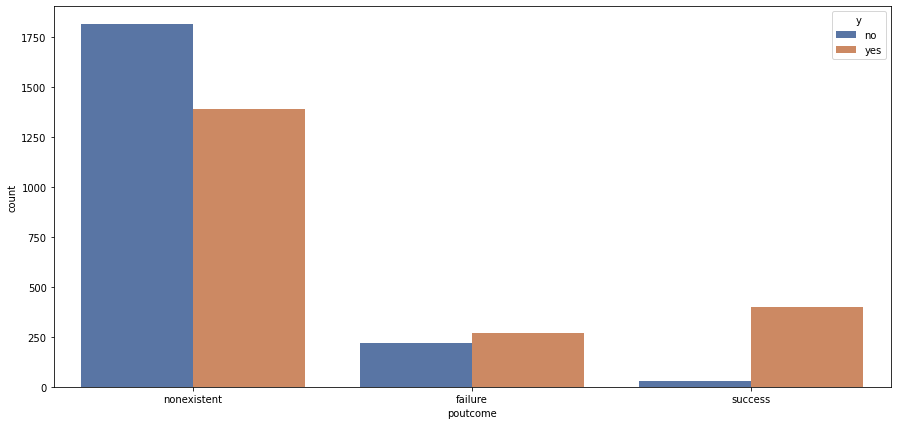

In [77]:
plt.figure(figsize=(15,7))
sns.countplot(x ='poutcome', hue = "y", data = df, palette = 'deep')

In [78]:
chi_sq_poutcome_y = pd.crosstab(df['poutcome'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_poutcome_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  

Chi Value: 378.3031012140358
7.120743267568573e-83


This indicates there is an association between the two variables (one has an impact on the other)


In [79]:
# lets look at day_of_week feature that has 5 distinct values and there distribution 
day_of_week = categorical_feature['day_of_week'].value_counts().to_frame()
day_of_week['Percent of all day_of_week types'] = day_of_week['day_of_week'] / sum(day_of_week['day_of_week'])
day_of_week

,day_of_week,Percent of all day_of_week types
thu,876,0.212725
wed,861,0.209082
tue,819,0.198883
mon,809,0.196455
fri,753,0.182856


In [80]:
# group by age and day_of_week 
day_of_week_age = df.groupby("day_of_week")["age"].mean()
day_of_week_age

day_of_week
fri    40.290837
mon    40.886279
thu    40.038813
tue    40.566545
wed    40.009292
Name: age, dtype: float64

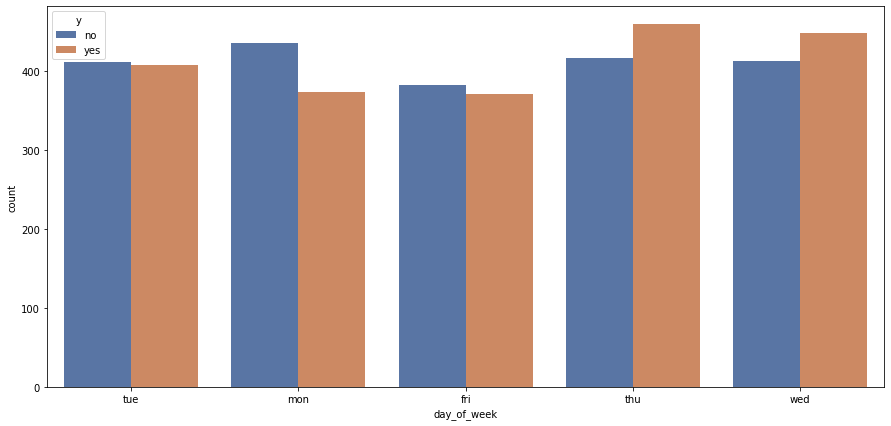

In [81]:
plt.figure(figsize=(15,7))
sns.countplot(x ='day_of_week', hue = "y", data = df, palette = 'deep')

In [82]:
chi_sq_day_of_week_y = pd.crosstab(df['day_of_week'], df['y'])

chiVal, pVal, d_f, exp = chi2_contingency(chi_sq_day_of_week_y)
chiVal, pVal, d_f, exp
print('Chi Value:',chiVal)
print(pVal)
print('\n')

if pVal < .05:
  print('This indicates there is an association between the two variables (one has an impact on the other)')
else:
  print('This indicates there is no association between the two variables (one has an impact on the other)')
  

Chi Value: 8.514199300138793
0.07445799242293076


This indicates there is no association between the two variables (one has an impact on the other)
